In [1]:
from DS_Planck_Unet import *
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
model = unet_planck(input_size=(64, 64, 6), filters=16, blocks=5, output_layers=1)

In [ ]:
model.summary()

In [3]:
batch_size = 20
min_rad = 0.08

In [4]:
val_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', val_pix, batch_size, 
                   search_nside=256, min_rad=min_rad)
train_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', train_pix, batch_size, 
                    search_nside=256, min_rad=min_rad)

In [5]:
def check_gen(gen, model=None):
    from matplotlib import pyplot as plt
    pic, mask = next(gen)
    print(pic.shape, mask.shape)
    pic = pic[0]
    mask = mask[0]
    fig, ax = plt.subplots(3, 3, figsize=(12, 12))
    for i in range(3):
        for j in range(2):
            ax[i][j].imshow(pic[:,:,i+3*j])
    ax[0][2].imshow(mask[:,:,0])
    if not (model is None):
        ans = model.predict(np.array([pic]))
        ax[1][2].imshow(ans[0,:,:,0])

In [ ]:
check_gen(train_gen)

In [ ]:
model.fit_generator(generator=train_gen, steps_per_epoch=5, epochs=1, 
                    validation_data=val_gen, validation_steps=1)

In [ ]:
check_gen(val_gen, model)

In [6]:
filepath='/home/rt2122/Models/'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min', save_weights_only=False)
callbacks_list = [checkpoint]

In [7]:
model.fit_generator(generator=train_gen, steps_per_epoch=20, epochs=10, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.4454 - accuracy: 0.9524 - iou: 0.0097 - dice: 0.0195
Epoch 00001: loss improved from inf to 0.44537, saving model to /home/rt2122/Models/
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /home/rt2122/Models/assets
20/20 [==============================] - 203s 10s/step - loss: 0.4454 - accuracy: 0.9524 - iou: 0.0097 - dice: 0.0195 - val_loss: 0.1970 - val_accuracy: 0.9865 - val_iou: 0.0097 - val_dice: 0.0194
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.1609 - accuracy: 0.9850 - iou: 0.0222 - dice: 0.0444
Epoch 00002: loss improved from 0.44537 to 0.16086, saving model to /home/rt2122/Models/
INFO:tensorflow:Assets written to: /home/rt2122/Models/assets
20/20 [==============================] - 163s 8s/step - loss: 0.1609 - accuracy: 0.9850 - iou: 0.0222 

In [8]:
test_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', test_pix, 1, 
                    search_nside=256, min_rad=min_rad)

(1, 64, 64, 6) (1, 64, 64, 1)


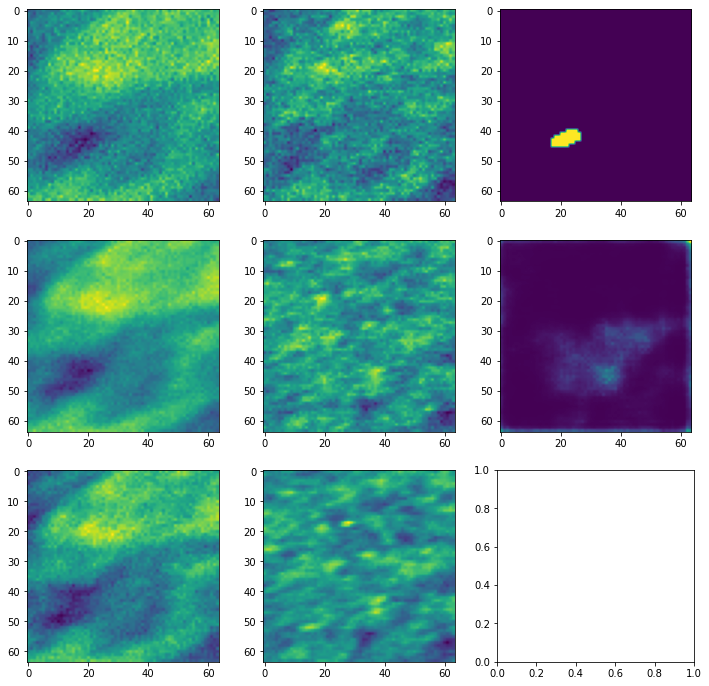

In [9]:
check_gen(test_gen, model)

In [10]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=50, epochs=20, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list)

Epoch 1/20
50/50 [==============================] - ETA: 0s - loss: 0.0828 - accuracy: 0.9862 - iou: 0.0471 - dice: 0.0943
Epoch 00001: loss improved from 0.08310 to 0.08276, saving model to /home/rt2122/Models/
INFO:tensorflow:Assets written to: /home/rt2122/Models/assets
50/50 [==============================] - 372s 7s/step - loss: 0.0828 - accuracy: 0.9862 - iou: 0.0471 - dice: 0.0943 - val_loss: 0.8287 - val_accuracy: 0.6894 - val_iou: 0.0150 - val_dice: 0.0299
Epoch 2/20
50/50 [==============================] - ETA: 0s - loss: 0.0774 - accuracy: 0.9866 - iou: 0.0536 - dice: 0.1072
Epoch 00002: loss improved from 0.08276 to 0.07741, saving model to /home/rt2122/Models/
INFO:tensorflow:Assets written to: /home/rt2122/Models/assets
50/50 [==============================] - 374s 7s/step - loss: 0.0774 - accuracy: 0.9866 - iou: 0.0536 - dice: 0.1072 - val_loss: 0.7884 - val_accuracy: 0.7307 - val_iou: 0.0139 - val_dice: 0.0277
Epoch 3/20
50/50 [==============================] - ETA: 0s 

Epoch 19/20
50/50 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9884 - iou: 0.0812 - dice: 0.1625
Epoch 00019: loss improved from 0.04446 to 0.04432, saving model to /home/rt2122/Models/
INFO:tensorflow:Assets written to: /home/rt2122/Models/assets
50/50 [==============================] - 367s 7s/step - loss: 0.0443 - accuracy: 0.9884 - iou: 0.0812 - dice: 0.1625 - val_loss: 0.2458 - val_accuracy: 0.9855 - val_iou: 0.0166 - val_dice: 0.0333
Epoch 20/20
50/50 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9883 - iou: 0.0888 - dice: 0.1776
Epoch 00020: loss improved from 0.04432 to 0.04359, saving model to /home/rt2122/Models/
INFO:tensorflow:Assets written to: /home/rt2122/Models/assets
50/50 [==============================] - 368s 7s/step - loss: 0.0436 - accuracy: 0.9883 - iou: 0.0888 - dice: 0.1776 - val_loss: 0.2157 - val_accuracy: 0.9891 - val_iou: 0.0192 - val_dice: 0.0384


(1, 64, 64, 6) (1, 64, 64, 1)


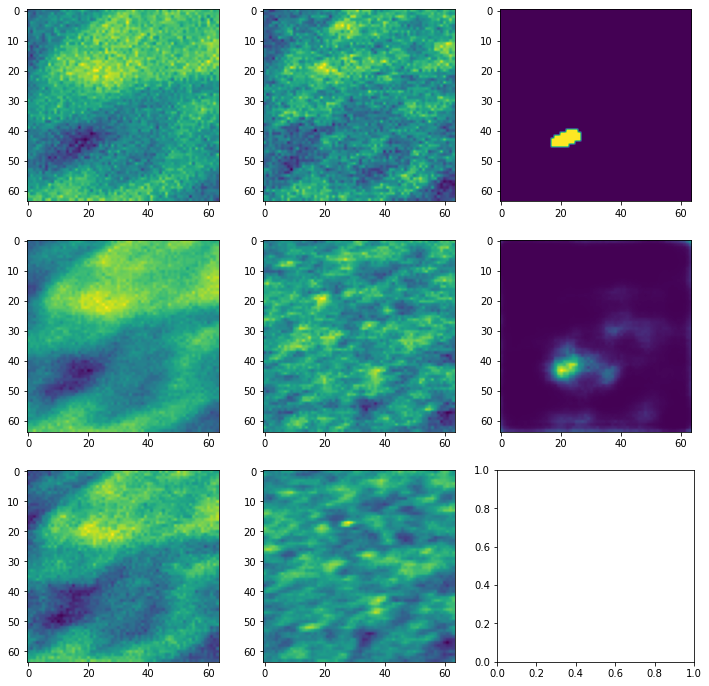

In [11]:
check_gen(test_gen, model)

In [12]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=50, epochs=20, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list)

Epoch 1/20
50/50 [==============================] - ETA: 0s - loss: 0.0425 - accuracy: 0.9884 - iou: 0.0861 - dice: 0.1723
Epoch 00001: loss improved from 0.04359 to 0.04249, saving model to /home/rt2122/Models/
INFO:tensorflow:Assets written to: /home/rt2122/Models/assets
50/50 [==============================] - 395s 8s/step - loss: 0.0425 - accuracy: 0.9884 - iou: 0.0861 - dice: 0.1723 - val_loss: 0.1892 - val_accuracy: 0.9886 - val_iou: 0.0191 - val_dice: 0.0383
Epoch 2/20
50/50 [==============================] - ETA: 0s - loss: 0.0399 - accuracy: 0.9887 - iou: 0.1001 - dice: 0.2003
Epoch 00002: loss improved from 0.04249 to 0.03994, saving model to /home/rt2122/Models/
INFO:tensorflow:Assets written to: /home/rt2122/Models/assets
50/50 [==============================] - 374s 7s/step - loss: 0.0399 - accuracy: 0.9887 - iou: 0.1001 - dice: 0.2003 - val_loss: 0.2126 - val_accuracy: 0.9894 - val_iou: 0.0197 - val_dice: 0.0393
Epoch 3/20
50/50 [==============================] - ETA: 0s 

Epoch 19/20
50/50 [==============================] - ETA: 0s - loss: 0.0238 - accuracy: 0.9914 - iou: 0.2808 - dice: 0.5617
Epoch 00019: loss did not improve from 0.02324
50/50 [==============================] - 368s 7s/step - loss: 0.0238 - accuracy: 0.9914 - iou: 0.2808 - dice: 0.5617 - val_loss: 0.1165 - val_accuracy: 0.9765 - val_iou: 0.0363 - val_dice: 0.0726
Epoch 20/20
50/50 [==============================] - ETA: 0s - loss: 0.0222 - accuracy: 0.9919 - iou: 0.2938 - dice: 0.5876
Epoch 00020: loss improved from 0.02324 to 0.02219, saving model to /home/rt2122/Models/
INFO:tensorflow:Assets written to: /home/rt2122/Models/assets
50/50 [==============================] - 373s 7s/step - loss: 0.0222 - accuracy: 0.9919 - iou: 0.2938 - dice: 0.5876 - val_loss: 0.0798 - val_accuracy: 0.9830 - val_iou: 0.0397 - val_dice: 0.0795


(1, 64, 64, 6) (1, 64, 64, 1)


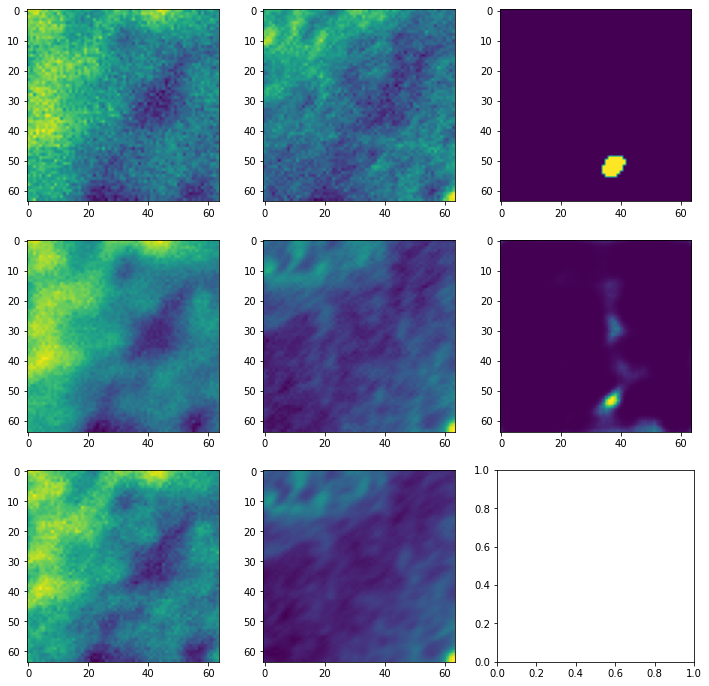

In [13]:
check_gen(test_gen, model)